In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
data = pd.read_csv('gbm-data.csv')
y=data.iloc[:,:1]
X=data.iloc[:,1:]
y=np.array(y.values)
X=np.array(X.values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=241)

c:\program files\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\program files\python37\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

      Iter       Train Loss   Remaining Time 
         1           1.0190           11.43s
         2           0.9192           11.01s
         3           0.8272            9.94s
         4           0.7834            9.20s
         5           0.7109            9.26s
         6           0.6368           11.42s
         7           0.5797           11.27s
         8           0.5610           11.90s
         9           0.5185           11.90s
        10           0.4984           11.45s
        20           0.1999           10.39s
        30           0.1313            9.65s
        40           0.0790            9.03s
        50           0.0511            8.59s
        60           0.0352            8.52s
        70           0.0245            7.91s
        80           0.0162            7.44s
        90           0.0114            6.94s
       100           0.0077            6.42s
       200           0.0004            1.73s
      Iter       Train Loss   Remaining Time 
        

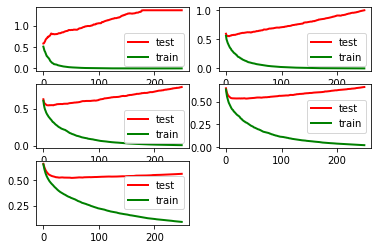

In [14]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
#clf = GradientBoostingClassifier(n_estimators=250,verbose=True,random_state=241)
%matplotlib inline

plt.figure()
kk=0
for k in [1, 0.5, 0.3, 0.2, 0.1]:
    kk+=1
    clf = GradientBoostingClassifier(n_estimators=250,verbose=True,random_state=241,learning_rate=k)
    clf.fit(X_train,y_train)
    test_loss=[]
    train_loss=[]
    for i, y_pred_train in enumerate(clf.staged_decision_function(X_train)):
        score_train=1/(1+np.exp(-y_pred_train))
        loss_train=log_loss(y_true=y_train,y_pred=score_train)
        train_loss.append(loss_train)
    for i, y_pred_test in enumerate(clf.staged_decision_function(X_test)):
        score_test=1/(1+np.exp(-y_pred_test))
        loss_test=log_loss(y_true=y_test,y_pred=score_test)
        test_loss.append(loss_test)
    plt.subplot(3,2,kk)
    plt.plot(test_loss, 'r', linewidth=2)
    plt.plot(train_loss, 'g', linewidth=2)
    plt.legend(['test', 'train'])
    if k==0.2:
        min_log_loss=min(test_loss)
        min_log_loss_iter=test_loss.index(min_log_loss)

In [12]:
f1 = open('1.txt', 'w')
f1.write('overfitting')
f1.close()




In [15]:
f2 = open('2.txt', 'w')
f2.write(str(round(min_log_loss,2))+' '+str(min_log_loss_iter))
f2.close()

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=min_log_loss_iter,random_state=241)
rf.fit(X_train,y_train)
rf_loss=log_loss(y_test,rf.predict_proba(X_test))

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
f3 = open('3.txt', 'w')
f3.write(str(round(rf_loss,2)))
f3.close()

